<a href="https://colab.research.google.com/github/28DEVANSH28/Google_Playstore_App_Review_Analysis/blob/main/Play_Store_App_Review_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Play Store App Review Analysis**

Project type - EDA

Contribution - Individual

# **Problem Statement**

 Play Store App Review Analysis project aims to extract valuable insights from user reviews of mobile applications available on the Google Play Store. The primary challenge is to understand the sentiments, preferences, and pain points of users regarding different apps, identify trends in app ratings, and uncover factors that contribute to user satisfaction or dissatisfaction.




The goal is to provide app developers, marketers, and decision-makers with
  actionable insights to improve app quality, enhance user experience, and optimize app performance in the competitive app market.

# 1. Knowing the Data





## Importing Libraries

In [145]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



##  Loading Data



In [146]:
#Load Dataset
data1 = pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')
data2 = pd.read_csv('/content/drive/MyDrive/User Reviews.csv')



## Dataset First View



In [147]:
# First view of dataset1
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [148]:
# First view of dataset2
data2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Dataset Rows and Columns

In [149]:
# Shape of data (Rows&columns)
data1.shape

(10841, 13)

In [150]:
# Shape of data (Rows&columns)
data2.shape

(64295, 5)

## Dataset Information

In [151]:
# Extracting the information about data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [152]:
# Extracting the information about data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


## Duplicate values

In [153]:
# Dataset Duplicate Value Count
len(data1[data1.duplicated()])

483

In [154]:
# Dataset Duplicate Value Count
len(data2[data2.duplicated()])

33616

## Missing or NULL values

In [155]:
# Missing Values/Null Values Count
print(data1.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [156]:
# Missing Values/Null Values Count
print(data2.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


<Axes: >

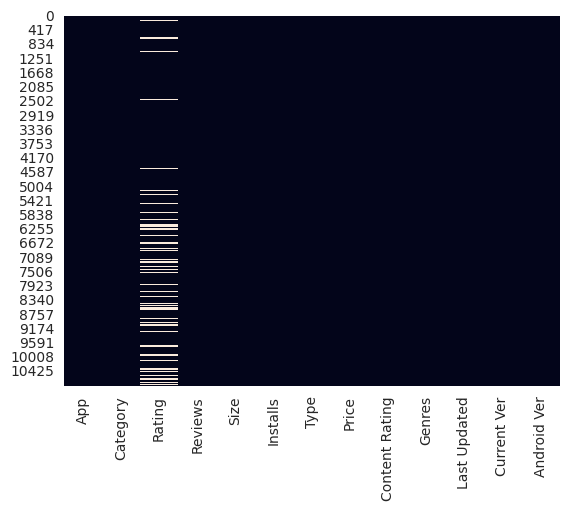

In [157]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(data1.isnull(), cbar=False)

<Axes: >

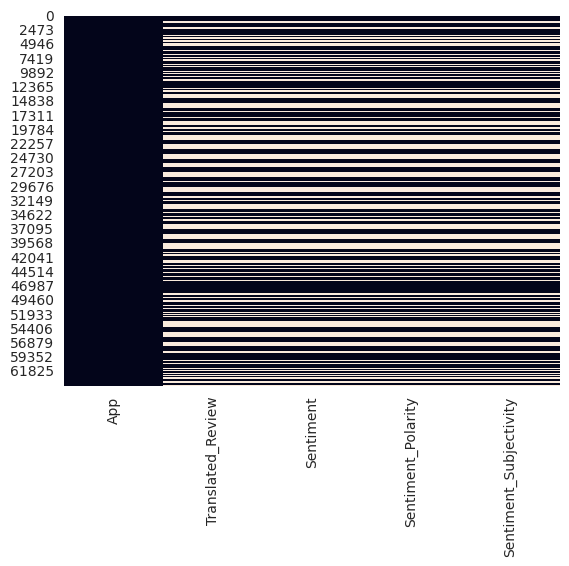

In [158]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(data2.isnull(), cbar=False)

#2. Understanding variables in Dataframes



## Dataframe 1 (Playstore Data)



In [159]:
data1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [160]:
data1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**VARIABLE DESCRIPTION**

This file contains data on the Google Play applications. It has 10,841 rows of data with the following columns:

App Category: Category of the app. This could be beauty, business, entertainment, education...etc.

Rating: How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

Reviews: The number of user reviews each app has received.

Size: The memory size needed to install the application.

Installs: The number of times each application has been installed by users.

Type: Whether the app is free or a paid app.

Price: The price of the app.

Content Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

Genres: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

Last Updated: Release date of the most recent update for the app.

Current Ver: The app's current version.

Android Ver: The oldest version of Android OS supported by the app.

##Dataframe 2 (User Review Data)

In [161]:
data2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [162]:
data2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


**VARIABLE DESCRIPTION**

This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:

App : Name of the app.

Translated_Review: Either the original review in English, or a translated version if the orignal review is in another language.

Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral, or Negative.

Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive).

Sentiment_Subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

#3. Cleaning the Dataframe



## Converting 'Reviews' to a numeric data type.


In [163]:
data1['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [164]:
# Converting datatype to numeric with pd.t_numeric
# errors = 'coerce' used this replace non numeric value with NAN(not a number)
data1['Reviews'] = pd.to_numeric(data1['Reviews'],errors='coerce')

In [165]:
data1['Reviews'].dtypes

dtype('float64')



## Converting 'Size' to a numeric data type.



In [166]:
data1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [167]:
def fix_size(s):
  try:
    if s.endswith('M'):
      return float(s[:-1])
    elif s.endswith('k'):
      # we will divide by 1024 as 1M = 1024K
      return (float(s[:-1])/1024)
    else:
      return np.nan
  except:
    return np.nan

In [168]:
# Checking the function
print(fix_size('100k'))
print(fix_size('100M'))
print(fix_size('devansh'))

0.09765625
100.0
nan


In [169]:
#Applying to "Size" column of dataframe
data1['Size']= data1['Size'].apply(fix_size)

In [170]:
data1['Size'].dtypes

dtype('float64')


##Converting 'Price' to a numeric data type.


In [171]:
data1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [172]:
def fix_price(p):
    try:
        if p.startswith('$'):
            return float(p[1:])
    except (AttributeError, ValueError):
        return np.nan  # Return None if the input is not in the expected format
    return 0.0  # Return 0.0 if the input is not in the expected format

In [173]:
#Checking the function
print(fix_price('$5.00'))
print(fix_price('devansh'))

5.0
0.0


In [174]:
#Applying to "Prize" column of dataframe
data1['Price']=data1['Price'].apply(fix_price)

In [175]:
data1['Price'].dtypes

dtype('float64')


## Removing outliers in 'Rating'



In [176]:
data1['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [177]:
get = data1[(data1['Rating']>5)].index
get
#Here in get we got the information regarding the rating which has value greater than 5

Int64Index([10472], dtype='int64')

In [178]:
#Droping that row from the dataframe
data1.drop(get,inplace=True)



## Lowering the case of 'Category' column





In [179]:
data1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [180]:
def lower_func(s):
  return s.title()

In [181]:
# Checking the function
lower_func('ART_AND_DESIGN')

'Art_And_Design'

In [182]:
#Applying the function to "category" column
data1['Category']=data1['Category'].apply(lower_func)

In [183]:
data1['Category'].unique()

array(['Art_And_Design', 'Auto_And_Vehicles', 'Beauty',
       'Books_And_Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food_And_Drink', 'Health_And_Fitness', 'House_And_Home',
       'Libraries_And_Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel_And_Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video_Players', 'News_And_Magazines', 'Maps_And_Navigation'],
      dtype=object)



##Converting 'Installs' to a numeric data type.



In [184]:
data1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [185]:
#Modifying the data
data1['Installs'] = data1.Installs.str.replace(",","")
data1['Installs'] = data1.Installs.str.replace("+","")
data1['Installs'] = data1['Installs'].astype(float)

<ipython-input-185-3f9ada8c40f7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['Installs'] = data1.Installs.str.replace("+","")


In [186]:
data1['Installs'].dtypes

dtype('float64')



##Modifying the Android Version based on requirements



In [187]:
data1['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [188]:
def correction(y):
  try:
    if y == 'Varies with device':
      return np.nan
    elif y == '4.4W and up':
      return y.replace('W','')
    else:
      return y
  except:
      return y

In [189]:
#checking the function
print(correction('Varies with device'))
print(correction('4.4W and up'))

nan
4.4 and up


In [190]:
#Appying the function to column
data1['Android Ver'] = data1['Android Ver'].apply(correction)

#4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables


##Chart-1 Paid Apps V/S Free Apps


In [191]:
agg_data = data1.groupby('Type').count()
agg_data

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Type,,,,,,,,,,,,
Free,10039,10039,8719,10039,8421,10039,10039,10039,10039,10039,10033,8743
Paid,800,800,647,800,724,800,800,800,800,800,798,733


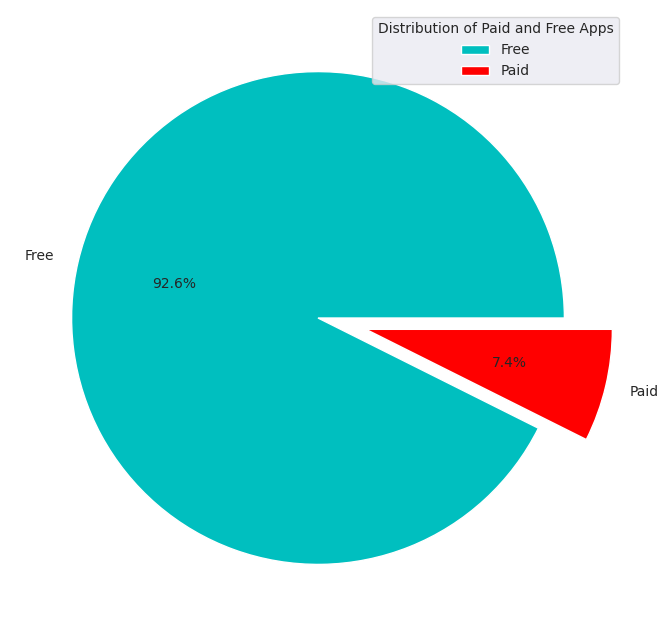

In [192]:
explode = [0,0.2]
labels = ['Free','Paid']
plt.figure(figsize=(8,8))
plt.pie(agg_data['App'], autopct ="%0.1f%%", explode = explode, labels = labels, colors = ['c','r'])
plt.legend(title="Distribution of Paid and Free Apps", loc = 'upper right')
plt.show()


## Chart-2 Number of Applications per category



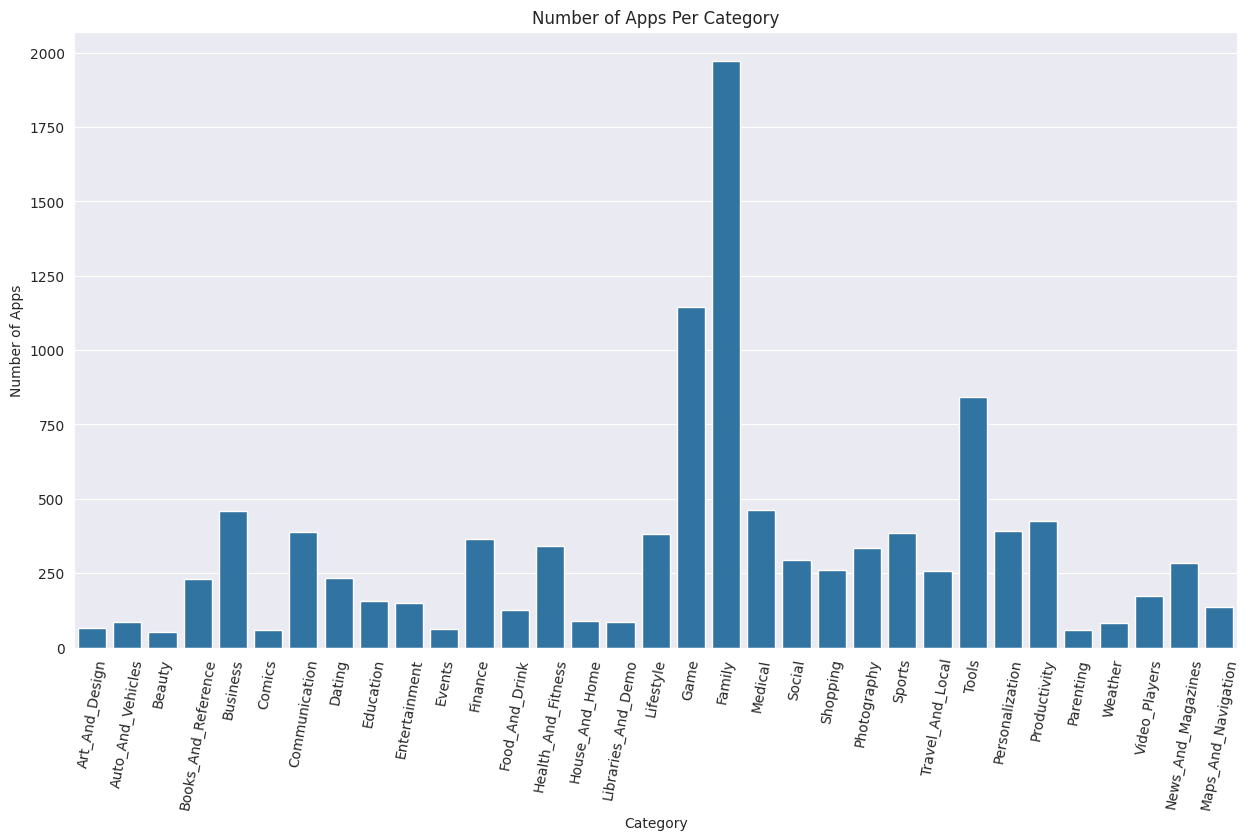

In [193]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='Category', data=data1)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=80)
plt.ylabel('Number of Apps')
plt.show()


##Chart-3 Content Rating



In [194]:
dataa = data1.groupby('Content Rating').count()
dataa

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Adults only 18+,3,3,3,3,2,3,3,3,3,3,3,2
Everyone,8714,8714,7420,8714,7416,8714,8714,8714,8714,8714,8706,7676
Everyone 10+,414,414,397,414,332,414,413,414,414,414,414,351
Mature 17+,499,499,461,499,406,499,499,499,499,499,499,419
Teen,1208,1208,1084,1208,987,1208,1208,1208,1208,1208,1208,1026
Unrated,2,2,1,2,2,2,2,2,2,2,2,2


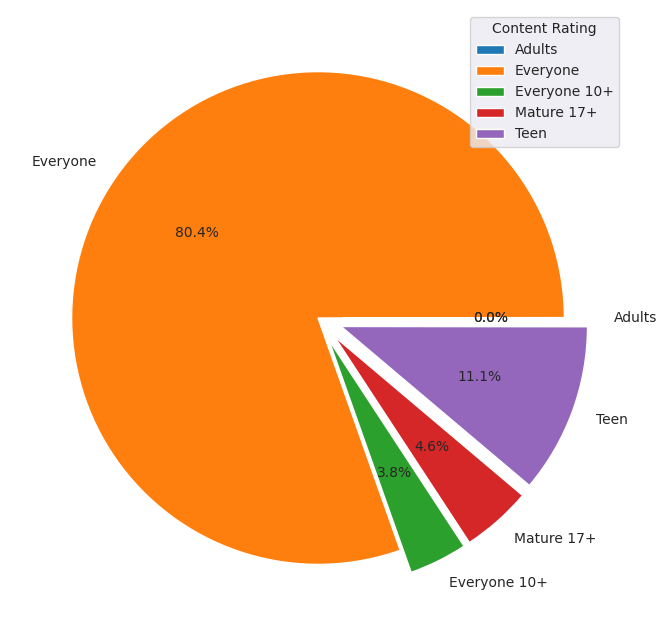

In [195]:
explode = [0.1,0,0.1,0.1,0.1,0.1]
labels = ['Adults','Everyone','Everyone 10+','Mature 17+','Teen','']
plt.figure(figsize=(8,8))
plt.pie(dataa['App'], autopct ="%0.1f%%", explode = explode, labels = labels)
plt.legend(title="Content Rating", loc = 'upper right')
plt.show()

##Chart-4 Review Sentiments



In [196]:
#Merging the user review data with Play store review data
merged_df = pd.merge(data1, data2, on = "App")
merged_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000


In [197]:
og = merged_df.groupby('Sentiment').count()
og

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment,,,,,,,,,,,,,,,,
Negative,18134,18134,18130,18134,11843,18134,18134,18134,18134,18134,18134,18134,14123,18134,18134,18134
Neutral,8286,8286,8282,8286,5037,8286,8286,8286,8286,8286,8286,8286,5863,8276,8286,8286
Positive,46195,46195,46164,46195,28169,46195,46195,46195,46195,46195,46195,46195,32859,46195,46195,46195


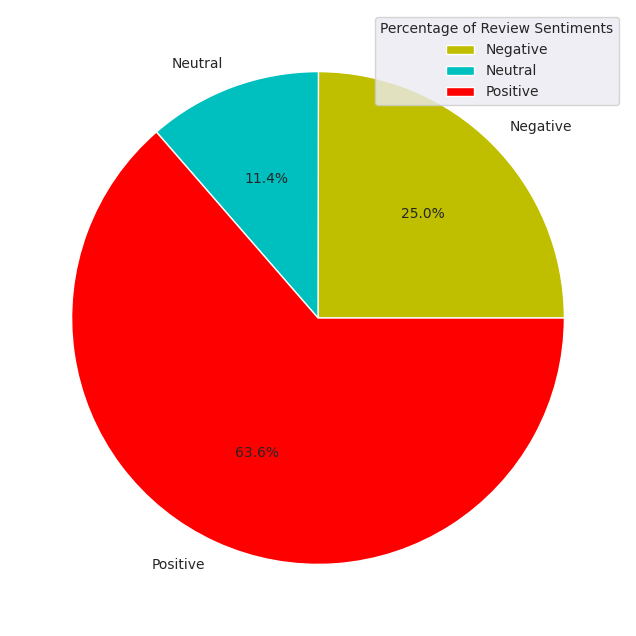

In [198]:
explode = [0,0,0]
labels = ['Negative','Neutral','Positive']
plt.figure(figsize=(8,8))
plt.pie(og['App'], autopct ="%0.1f%%", explode = explode, labels = labels, colors = ['y','c','r'])
plt.legend(title="Percentage of Review Sentiments", loc = 'upper right')
plt.show()

##Chart-5 App Pricing Trends



Text(0.5, 1.0, 'App pricing trend across categories')

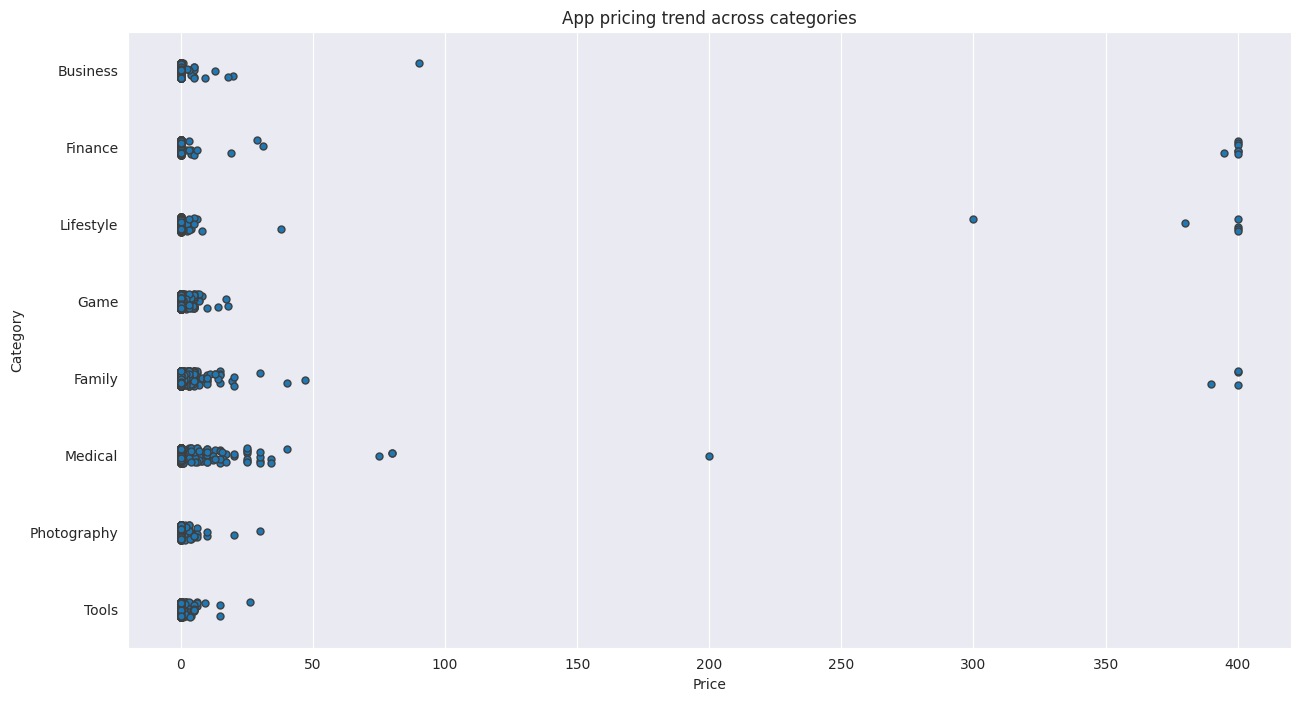

In [199]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = data1[data1.Category.isin(['Game', 'Family', 'Photography',
                                            'Medical', 'Tools', 'Finance',
                                            'Lifestyle','Business'])]

ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

#5. Solution to Business Objective


As per the above analysis FAMILY category has very much scope because it has all age group people. second category is GAME that has also scope.

Eventhough apps from the categories like FAMILY, SOCIAL, COMMUNICATION and ENTERTAINMENT of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE). As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.



#6. Conclusion

After analyzing the dataset we have got answers to some of the serious & interesting facts which any of the android users would love to know.

a) Top 10 Highest rating Apps in google play store in terms of categories

b) Number of Application in terms of Category

c) Top 10 apps which has more downloads

d) We found out the percentage distribution of sentiments (Negative,Neutral,Postive). which will help user and developer to identify the improvement areas.

e) Free and Paid Apps

f) Relation between app category and app price

The Google Play Store Apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. There are some spikes in term of size and price but it shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL and GAME like Instagram, Clash of Clans etc.

